# Task 1-Data Preparation and Customer Analytics
Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.

**Background information for the task**

We need to present a strategic recommendation to Julia that is supported by data which she can use for the upcoming category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour. 

Main goals of this task are :

1.   Examine transaction data - check for missing data, anomalies, outliers and clean them.
2.   Data analysis and customer segments - create charts and graphs, trends and insights
3.   Deep dive into customer segments - determine which segments should be targetted  





### TASK 1: Data Preparation and Customer Analytics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
#import sweetviz

In [7]:
df = pd.read_excel('dataset/QVI_transaction_data.xlsx', engine='openpyxl')
df.sample(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
18952,43565,60,60145,56764,71,Twisties Cheese Burger 250g,2,8.6
248008,43608,126,126326,130289,44,Thins Chips Light& Tangy 175g,2,6.6
197844,43643,179,179113,180000,27,WW Supreme Cheese Corn Chips 200g,2,3.8
29951,43523,210,210062,209177,88,Kettle Honey Soy Chicken 175g,2,10.8
98616,43414,266,266036,263867,75,Cobs Popd Sea Salt Chips 110g,1,3.8


In [8]:
df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 15.2+ MB


##### About the dataset:
- The dataset has 8 features with 264836 rows.
- The features have no missing values,
- The date feature is int type so it will be changed to date time format.

In [9]:
#df_report = sweetviz.analyze(df, target_feat='TOT_SALES ')
#df_report.show_notebook()

In [35]:
#from summarytools import dfSummary
#dfSummary(df)

In [9]:
df2 = pd.read_csv('dataset/QVI_purchase_behaviour.csv')
df2.sample(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
8688,32093,OLDER FAMILIES,Premium
17707,65079,YOUNG FAMILIES,Budget
63941,239346,RETIREES,Mainstream
23510,84322,OLDER SINGLES/COUPLES,Mainstream
54836,205426,YOUNG SINGLES/COUPLES,Premium
46471,174081,OLDER SINGLES/COUPLES,Premium
12664,47184,OLDER SINGLES/COUPLES,Premium
46966,175283,RETIREES,Premium
57347,216257,MIDAGE SINGLES/COUPLES,Premium
19347,71019,YOUNG FAMILIES,Mainstream


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


#### Merge the dataset

In [11]:
# merge the two dataframes
merged_df = df.merge(df2, on='LYLTY_CARD_NBR', how='left')
merged_df.sample(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
24810,43547,262,262015,261401,95,Sunbites Whlegrn Crisps Frch/Onin 90g,2,3.4,MIDAGE SINGLES/COUPLES,Premium
201044,43494,225,225033,224859,7,Smiths Crinkle Original 330g,2,11.4,YOUNG FAMILIES,Budget
29753,43596,183,183167,185794,74,Tostitos Splash Of Lime 175g,2,8.8,NEW FAMILIES,Mainstream


In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 19.2+ MB


In [9]:
# change the date feature data type
merged_df['DATE'] =  pd.to_datetime(merged_df['DATE'], origin='1899-12-30', unit='D')
merged_df.dtypes

DATE                datetime64[ns]
STORE_NBR                    int64
LYLTY_CARD_NBR               int64
TXN_ID                       int64
PROD_NBR                     int64
PROD_NAME                   object
PROD_QTY                     int64
TOT_SALES                  float64
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
dtype: object

In [10]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [11]:
merged_df[['PROD_QTY', 'TOT_SALES']].describe(percentiles=[.1, .25, .50, .75, .90])

,PROD_QTY,TOT_SALES
count,264836.000000,264836.000000
mean,1.907309,7.304200
std,0.643654,3.083226
min,1.000000,1.500000
10%,1.000000,3.800000
25%,2.000000,5.400000
50%,2.000000,7.400000
75%,2.000000,9.200000
90%,2.000000,10.800000
max,200.000000,650.000000


In [12]:
merged_df.select_dtypes('object').describe()

,PROD_NAME,LIFESTAGE,PREMIUM_CUSTOMER
count,264836,264836,264836
unique,114,7,3
top,Kettle Mozzarella Basil & Pesto 175g,OLDER SINGLES/COUPLES,Mainstream
freq,3304,54479,101988


In [13]:
merged_df.PROD_QTY.value_counts()

2      236039
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64

In [14]:
merged_df[merged_df.TOT_SALES == 650]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium


In [15]:
merged_df[merged_df.PROD_QTY == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium


* There are two outliers from the same card number. Both quantity and sales will be imputated by median. 

##### Observations:
- PROD_QTY i.e. product quantity have some extremely high values. There are orders of 200 packets when 90% of orders are 2 packets only.
- TOT_SALES also have extremely high values, 90% of sales is 10.8 and maximum order is 650. 
- There are 114 kinds of product names with Kettle Mozzarella Basil & Pesto as the highest product sold (3304 freq).
- There are 7 kinds of lifestage with OLDER SINGLES/COUPLES as the most frequency.
- Three kinds of premium customers with the mainstream as the most frequency.

#### Handling Outliers

In [16]:
# replace outliers with median
max_qty = merged_df['PROD_QTY'].max()
median_qty = merged_df['PROD_QTY'].median()
merged_df['PROD_QTY'] = merged_df['PROD_QTY'].replace(max_qty, median_qty)

In [17]:
merged_df.PROD_QTY.value_counts()

2    236041
1     27518
5       450
3       430
4       397
Name: PROD_QTY, dtype: int64

In [18]:
# replace outliers of sales feature with median 
max_sales = merged_df['TOT_SALES'].max()
median_sales = merged_df['TOT_SALES'].median()
merged_df['TOT_SALES'] = merged_df['TOT_SALES'].replace(max_sales, median_sales)

In [19]:
merged_df[(merged_df['TOT_SALES'] == 650) | (merged_df['PROD_QTY'] == 200) ].count()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [20]:
merged_df[['PROD_QTY', 'TOT_SALES']].describe(percentiles=[.75, .90])

,PROD_QTY,TOT_SALES
count,264836.000000,264836.000000
mean,1.905813,7.299347
std,0.343435,2.527231
min,1.000000,1.500000
50%,2.000000,7.400000
75%,2.000000,9.200000
90%,2.000000,10.800000
max,5.000000,29.500000


* outliers were succesfully imputated with median 

#### check date feature

In [21]:
print('Date Start: {} '.format(merged_df['DATE'].min()))
print('Date end: {} '.format(merged_df['DATE'].max()))
print('Date count: {} '.format(merged_df['DATE'].nunique()))

Date Start: 2018-07-01 00:00:00 
Date end: 2019-06-30 00:00:00 
Date count: 364 


In [22]:
# find the missing date
pd.date_range(start=merged_df['DATE'].min(), end=merged_df['DATE'].max()).difference(merged_df['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

- Transaction starts from 1st July 2018 to 30th June 2019.
- There are 365 days in a year, but the uniques date are only 364. It must be a day no transaction.
- The day where no transaction is a chirstmas day where the store is closed.

In [23]:
#check store nbr, lylt_card_nbr, prod_nbr unique values
store_nq = merged_df.STORE_NBR.nunique()
prod_nq = merged_df.PROD_NBR.nunique()
prodname_nq = merged_df.PROD_NAME.nunique()
print('store unique number: ' , store_nq)
print('product unique number: ' , prod_nq)
print('product unique name: ', prodname_nq)


store unique number:  272
product unique number:  114
product unique name:  114


##### derive brand name from product name

In [24]:
merged_df['BRAND_NAME'] = merged_df['PROD_NAME'].str.split(pat = ' ', n=1, expand=True)[0]

In [25]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle


In [26]:
brands = merged_df.BRAND_NAME.unique()
brands

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

- Some brand names are spelt incorrectly. 
- Brand name is spelt differently in the same brand name like Dorito and Doritos, Smith and Smiths, Infuzions and Infzns.
- Abbrevations are used for a few brand names.

In [27]:
def brand_names (x):
    brand = x['BRAND_NAME']
    if brand == 'Dorito':
        return 'Doritos'
    elif brand == "GrnWves" or brand == "Grain":
        return "Grain Waves"
    elif brand == "Infzns":
        return "Infuzions"
    elif brand == "Natural" or brand == "NCC":
        return "Natural Chip Co"
    elif brand == "Red":
        return "RRD"
    elif brand == "Smith":
        return "Smiths"
    elif brand == "Snbts":
        return "Sunbites"
    elif brand == "WW":
        return "Woolworths"
    else:
        return brand


In [28]:
merged_df["BRAND_NAME"] = merged_df.apply(lambda x: brand_names(x), axis=1)
merged_df.BRAND_NAME.nunique()

21

In [47]:
# create package_size feature from prod_name
def pack_size(x):
    nums = []
    for i in x:
        if i in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']:
            nums.append(i)
    return int("".join(nums))

In [48]:
merged_df['PACKAGE_SIZE(gr)'] = merged_df['PROD_NAME'].apply(pack_size)
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND_NAME,PACKAGE_SIZE(gr)
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Co,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle,150


In [49]:
merged_df.to_csv('dataset/data_cleaning.csv', index=False)

#### `EXPLORATORY DATA ANALYSIS`

In [2]:
df_cleaning = pd.read_csv('dataset/data_cleaning.csv')
df_cleaning.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND_NAME,PACKAGE_SIZE(gr)
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Co,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle,150


#### sales based on date

In [3]:
tot_sales = df_cleaning.groupby(['DATE']).agg({'TOT_SALES' : 'sum'}).reset_index()
tot_sales.columns = ['Date', 'Sales']
tot_sales

,Date,Sales
0,2018-07-01,5372.2
1,2018-07-02,5315.4
2,2018-07-03,5321.8
3,2018-07-04,5309.9
4,2018-07-05,5080.9
...,...,...
359,2019-06-26,5305.0
360,2019-06-27,5202.8
361,2019-06-28,5299.6
362,2019-06-29,5497.6


In [4]:
plt.figure(figsize=(15,10))
fig = px.line(tot_sales, x='Date', y ='Sales', title='Time Period July 2018 - June 2019')
fig.update_layout(width = 1000, height = 500)
fig.show()

<Figure size 1080x720 with 0 Axes>

- <b> a week before christmas day the sales increases sharply. </b>

#### Which brand has the highest sales ?

In [6]:
cnt_brand = df_cleaning.groupby('BRAND_NAME').agg({'LYLTY_CARD_NBR' : 'count'}).reset_index()
cnt_brand.columns = ['brand', 'cnt_brand']
cnt_brand = cnt_brand.sort_values(by=['cnt_brand'], ascending=False)
cnt_brand

,brand,cnt_brand
9,Kettle,41288
14,Smiths,31823
5,Doritos,28147
12,Pringles,25102
13,RRD,17779
20,Woolworths,14757
8,Infuzions,14201
16,Thins,14075
4,Cobs,9693
17,Tostitos,9471


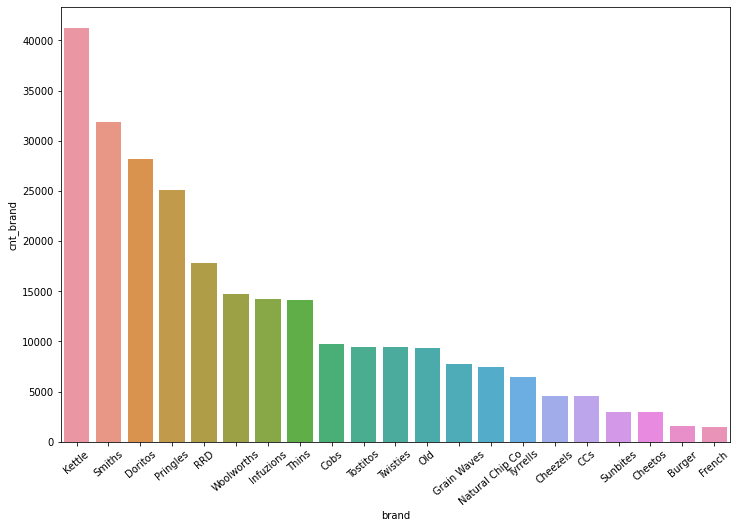

In [7]:
plt.figure(figsize=(12,8))
sns.barplot(data=cnt_brand, x = 'brand', y = 'cnt_brand')
plt.xticks(rotation=40)
plt.show()

- There are 21 brands 
- The brand of Kettle, smiths, and Doritos is the highest sales.
- french, burger and cheetos are lowest brand sales.

In [8]:
sales = df_cleaning.groupby('BRAND_NAME').agg({'TOT_SALES' : ['sum', 'mean']}).reset_index()
sales.columns = ['brand', 'total_sales', 'avg_sales']
sales['avg_sales'] = round(sales['avg_sales'], 2) 
sales

,brand,total_sales,avg_sales
0,Burger,6831.0,4.37
1,CCs,18078.9,3.97
2,Cheetos,16884.5,5.77
3,Cheezels,40029.9,8.70
4,Cobs,70569.8,7.28
5,Doritos,240605.7,8.55
6,French,7929.0,5.59
7,Grain Waves,51617.2,6.67
8,Infuzions,99047.6,6.97
9,Kettle,390239.8,9.45


In [9]:
sale = sales.sort_values(by=['total_sales', 'avg_sales'], ascending=[False, False])
sale

,brand,total_sales,avg_sales
9,Kettle,390239.8,9.45
5,Doritos,240605.7,8.55
14,Smiths,224660.2,7.06
12,Pringles,177655.5,7.08
8,Infuzions,99047.6,6.97
13,RRD,95046.0,5.35
11,Old,90785.1,9.74
16,Thins,88852.5,6.31
18,Twisties,81522.1,8.62
17,Tostitos,79789.6,8.42


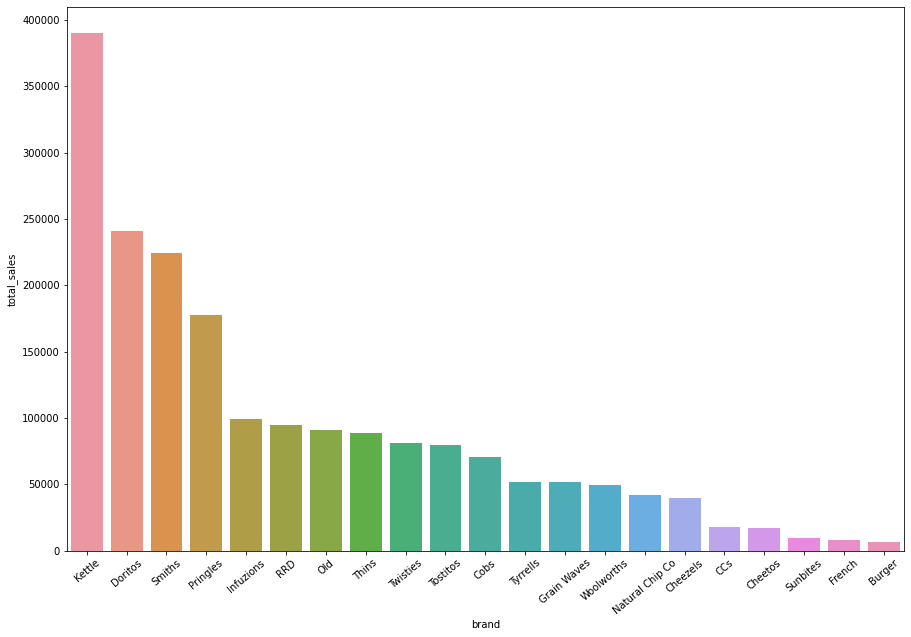

In [10]:
# plot brand name and total sales
plt.figure(figsize=(15,10))
sns.barplot(data=sale, x = 'brand', y = 'total_sales')
plt.xticks(rotation = 40)
plt.show()

- Kettle brand has 390.239 total sales with 9.45 average sales. 
- Old brand has the highest average (9.45)

#### Which Package size has the highest sales ?

In [11]:
cnt_pack = df_cleaning.groupby('PACKAGE_SIZE(gr)')['PACKAGE_SIZE(gr)'].count()
cnt_pack

PACKAGE_SIZE(gr)
70      1507
90      3008
110    22387
125     1454
134    25102
135     3257
150    43131
160     2970
165    15297
170    19983
175    66390
180     1468
190     2995
200     4473
210     6272
220     1564
250     3169
270     6285
300    15166
330    12540
380     6418
Name: PACKAGE_SIZE(gr), dtype: int64

<AxesSubplot:xlabel='PACKAGE_SIZE(gr)', ylabel='count'>

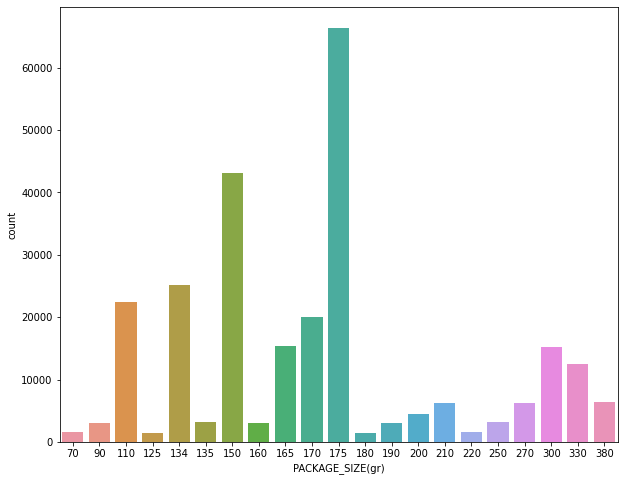

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(df_cleaning['PACKAGE_SIZE(gr)'])

In [13]:
sales_package = df_cleaning.groupby('PACKAGE_SIZE(gr)').agg({'TOT_SALES' : ['sum']}).reset_index()
sales_package.columns = ['package_size', 'total_sales']
sales_package

,package_size,total_sales
0,70,6852.0
1,90,9676.4
2,110,162765.4
3,125,5733.0
4,134,177655.5
5,135,26090.4
6,150,304288.5
7,160,10647.6
8,165,101360.6
9,170,146673.0


<AxesSubplot:xlabel='package_size', ylabel='total_sales'>

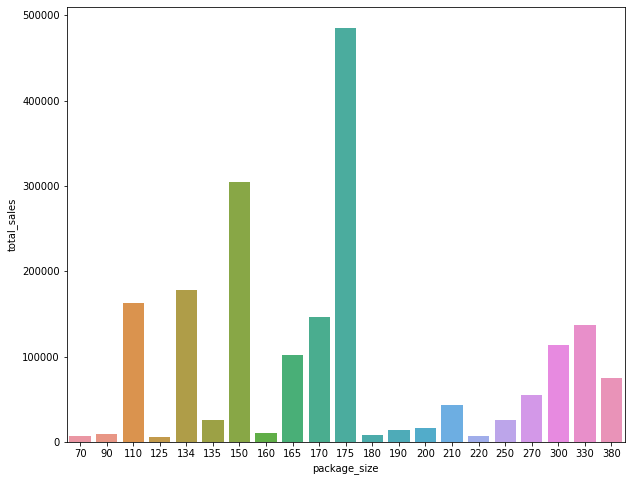

In [14]:
### sales for each package size
plt.figure(figsize=(10,8))
sns.barplot(data=sales_package, x='package_size', y ='total_sales')


- There are 21 package size.
- 175 gr package size has 66390 product sold and the highest sales with $485437.4

#### Which lifestage Customer has the highest number and the highest sales?

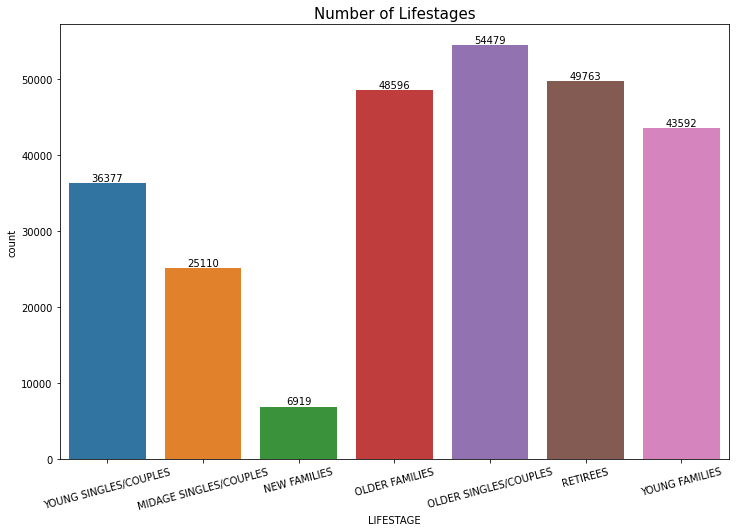

In [16]:
plt.figure(figsize=(12,8))
ax = sns.countplot(df_cleaning['LIFESTAGE'])
ax.bar_label(ax.containers[0])
plt.title('Number of Lifestages', fontsize=15)
plt.xticks(rotation=15)
plt.show()

In [17]:
sales_lifestage = df_cleaning.groupby('LIFESTAGE').agg({'TOT_SALES' : ['sum']}).reset_index()
sales_lifestage.columns = ['lifestage', 'tot_sales']
sales_lifestage

,lifestage,tot_sales
0,MIDAGE SINGLES/COUPLES,184751.30
1,NEW FAMILIES,50433.45
2,OLDER FAMILIES,352482.00
3,OLDER SINGLES/COUPLES,402426.75
4,RETIREES,366470.90
5,YOUNG FAMILIES,316160.10
6,YOUNG SINGLES/COUPLES,260405.30


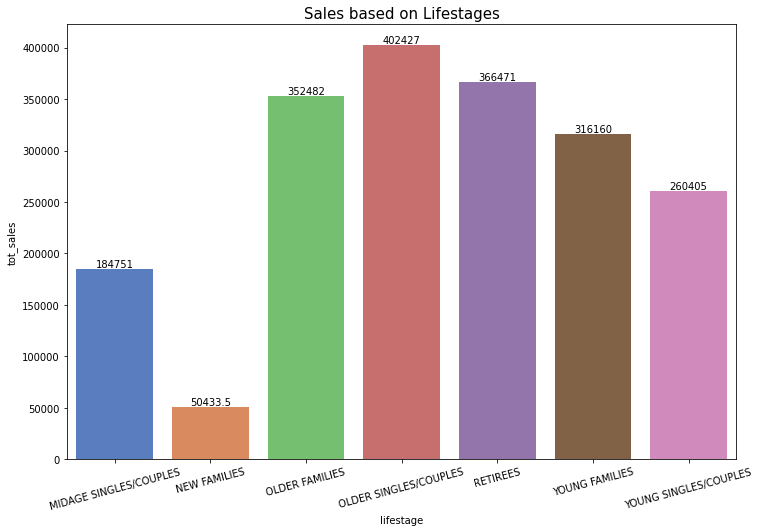

In [18]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=sales_lifestage, x = 'lifestage', y = 'tot_sales', palette='muted')
ax.bar_label(ax.containers[0])
plt.title('Sales based on Lifestages', fontsize=15)
plt.xticks(rotation=15)
plt.show()

- There are 7 lifestages. The lifestage of older singles/couples has the highest number with $402426.75 sales.
- New families have the least transaction among the segments.
- The higher the number of lifestage customer, the higher the sales.

#### Which premium customer has the highest number and sales ? 

In [19]:
# number of premium customers
cntd_cust = df_cleaning.groupby('PREMIUM_CUSTOMER')['LYLTY_CARD_NBR'].nunique().reset_index()
cntd_cust.columns = ['cust_segment', 'cnt_customer']
#cntd_cust
px.histogram(cntd_cust, x='cust_segment', y = 'cnt_customer')


In [34]:
sales_cust = df_cleaning.groupby('PREMIUM_CUSTOMER').agg(
    {'TOT_SALES': ['sum']}).reset_index()
sales_cust.columns = ['cust_segment', 'tot_sales']
sales_cust


,cust_segment,tot_sales
0,Budget,676211.55
1,Mainstream,750744.50
2,Premium,506173.75


- The customer segments are divided into 3 categories (Budget, mainstream, and premium).
- Most customers segments are mainstream and least premium.
- Most transactions are done by mainstream customers and least by premium customers.

#### What features are correlated ?

<AxesSubplot:>

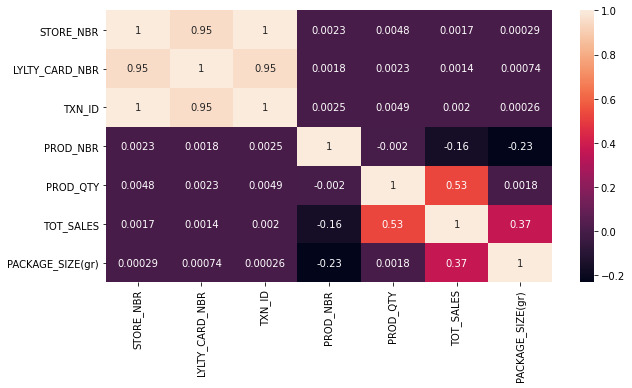

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(df_cleaning.corr(), annot=True)

### Who spends the most on transactions based on lifestages and customer segments ?

In [21]:
sales_segment = df_cleaning.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).agg({
    'TOT_SALES': 'sum'}).reset_index()
sales_segment.columns = ['cust_segment', 'lifestage', 'tot_sales']
sales_segment

,cust_segment,lifestage,tot_sales
0,Budget,MIDAGE SINGLES/COUPLES,35514.80
1,Budget,NEW FAMILIES,21928.45
2,Budget,OLDER FAMILIES,168363.25
3,Budget,OLDER SINGLES/COUPLES,136769.80
4,Budget,RETIREES,113147.80
5,Budget,YOUNG FAMILIES,139345.85
6,Budget,YOUNG SINGLES/COUPLES,61141.60
7,Mainstream,MIDAGE SINGLES/COUPLES,90803.85
8,Mainstream,NEW FAMILIES,17013.90
9,Mainstream,OLDER FAMILIES,103445.55


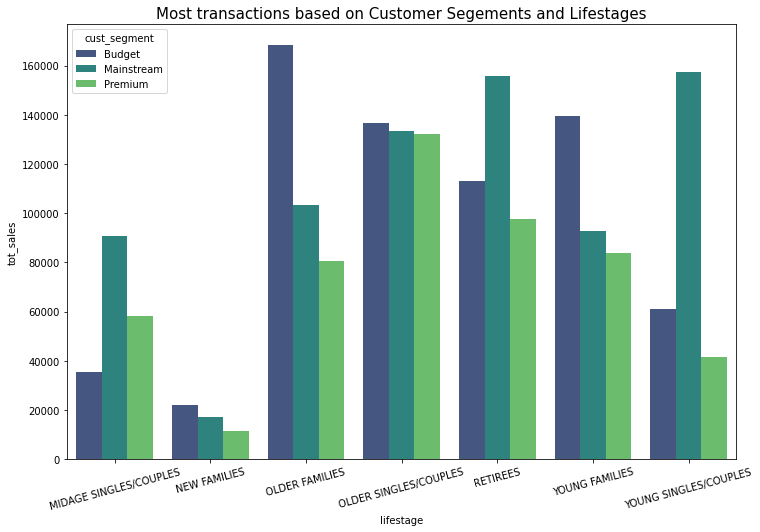

In [22]:
plt.figure(figsize=(12,8))
sns.barplot(data=sales_segment, x = 'lifestage', y = 'tot_sales', hue='cust_segment', palette='viridis')
plt.title('Most transactions based on Customer Segements and Lifestages', fontsize = 15)
plt.xticks(rotation=15)
plt.show()

#### How many customers are in each segement? 

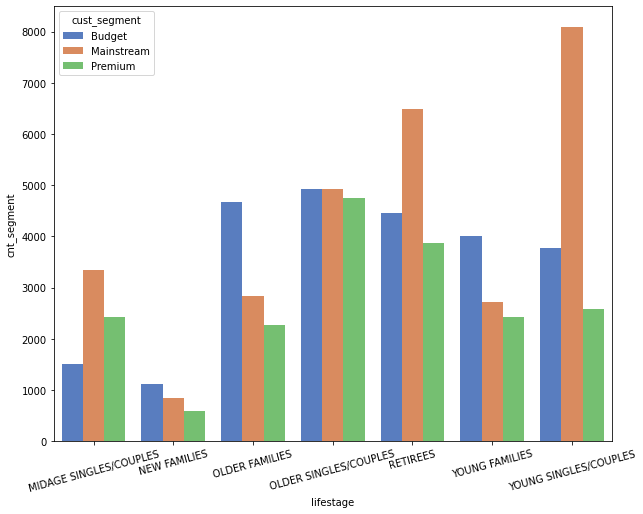

,cust_segment,lifestage,cnt_segment
13,Mainstream,YOUNG SINGLES/COUPLES,8088
11,Mainstream,RETIREES,6479
10,Mainstream,OLDER SINGLES/COUPLES,4930
3,Budget,OLDER SINGLES/COUPLES,4929
17,Premium,OLDER SINGLES/COUPLES,4750
2,Budget,OLDER FAMILIES,4675
4,Budget,RETIREES,4454
5,Budget,YOUNG FAMILIES,4017
18,Premium,RETIREES,3872
6,Budget,YOUNG SINGLES/COUPLES,3779


In [23]:
cnt_seg = df_cleaning.groupby(
    ['PREMIUM_CUSTOMER', 'LIFESTAGE']).agg({'LYLTY_CARD_NBR' : 'nunique'}).reset_index()
cnt_seg.columns = ['cust_segment', 'lifestage', 'cnt_segment']

plt.figure(figsize=(10,8))
sns.barplot(data= cnt_seg, x = 'lifestage', y = 'cnt_segment', hue='cust_segment', palette='muted')
plt.xticks(rotation = 15)
plt.show()

cnt_seg.sort_values(by='cnt_segment', ascending=False)

#### What brands contribute to total sales?

In [24]:
sales_brand = df_cleaning.groupby(
    ['PREMIUM_CUSTOMER', 'LIFESTAGE']).agg({'BRAND_NAME' : [pd.Series.mode, 'count']}).reset_index()
sales_brand.columns = ['cust_segment', 'lifestage', 'mode_brand', 'cnt_brand']
sales_brand.sort_values(by='cnt_brand', ascending=False)


,cust_segment,lifestage,mode_brand,cnt_brand
2,Budget,OLDER FAMILIES,Kettle,23160
11,Mainstream,RETIREES,Kettle,21466
13,Mainstream,YOUNG SINGLES/COUPLES,Kettle,20854
5,Budget,YOUNG FAMILIES,Kettle,19122
3,Budget,OLDER SINGLES/COUPLES,Kettle,18407
10,Mainstream,OLDER SINGLES/COUPLES,Kettle,18318
17,Premium,OLDER SINGLES/COUPLES,Kettle,17754
4,Budget,RETIREES,Kettle,15201
9,Mainstream,OLDER FAMILIES,Kettle,14244
18,Premium,RETIREES,Kettle,13096


- Every segment has Kettle as the most purchased brand.

#### What's the average chip price by customer segments ?

In [25]:
price_chip = df_cleaning[['PREMIUM_CUSTOMER', 'LIFESTAGE']]
price_chip['price_chip'] = df_cleaning['TOT_SALES'] / df_cleaning['PROD_QTY']
price_chip.columns = ['cust_segements', 'lifestage', 'price_chip']
price_chip


,cust_segements,lifestage,price_chip
0,Premium,YOUNG SINGLES/COUPLES,3.00
1,Budget,MIDAGE SINGLES/COUPLES,2.10
2,Budget,MIDAGE SINGLES/COUPLES,1.45
3,Budget,MIDAGE SINGLES/COUPLES,3.00
4,Budget,MIDAGE SINGLES/COUPLES,4.60
...,...,...,...
264831,Premium,YOUNG SINGLES/COUPLES,5.40
264832,Premium,YOUNG SINGLES/COUPLES,4.40
264833,Premium,YOUNG SINGLES/COUPLES,4.40
264834,Premium,YOUNG SINGLES/COUPLES,3.90


In [27]:
avg_price_chip =price_chip.groupby(['cust_segements', 'lifestage']).agg({'price_chip' : 'mean'}).reset_index()
avg_price_chip.columns = ['cust_segements', 'lifestage', 'avg_price_chip']
avg_price_chip['avg_price_chip'] = round(avg_price_chip['avg_price_chip'], 2)
avg_price_chip.sort_values(by='avg_price_chip', ascending=False)

,cust_segements,lifestage,avg_price_chip
13,Mainstream,YOUNG SINGLES/COUPLES,4.07
7,Mainstream,MIDAGE SINGLES/COUPLES,4.00
4,Budget,RETIREES,3.92
18,Premium,RETIREES,3.92
8,Mainstream,NEW FAMILIES,3.92
1,Budget,NEW FAMILIES,3.92
17,Premium,OLDER SINGLES/COUPLES,3.89
3,Budget,OLDER SINGLES/COUPLES,3.88
15,Premium,NEW FAMILIES,3.87
11,Mainstream,RETIREES,3.83


- Top 3 customer segments per average transactions:
    * Mainstream - YOUNG SINGLES/COUPLES
    * Mainstream - MIDAGE SINGLES/COUPLES	
    * Budget - RETIREES
- Budget and Premium for young single/couples have least average chips price.

### How many chips are bough per customers by segments?

In [29]:
qty_chips = df_cleaning.groupby(
    ['PREMIUM_CUSTOMER', 'LIFESTAGE']).agg({'PROD_QTY' : 'sum', 'LYLTY_CARD_NBR' : pd.Series.nunique}).reset_index()
qty_chips.sort_values(by = 'LYLTY_CARD_NBR', ascending=False)

,PREMIUM_CUSTOMER,LIFESTAGE,PROD_QTY,LYLTY_CARD_NBR
13,Mainstream,YOUNG SINGLES/COUPLES,38632,8088
11,Mainstream,RETIREES,40518,6479
10,Mainstream,OLDER SINGLES/COUPLES,34997,4930
3,Budget,OLDER SINGLES/COUPLES,35220,4929
17,Premium,OLDER SINGLES/COUPLES,33986,4750
2,Budget,OLDER FAMILIES,45065,4675
4,Budget,RETIREES,28764,4454
5,Budget,YOUNG FAMILIES,37111,4017
18,Premium,RETIREES,24884,3872
6,Budget,YOUNG SINGLES/COUPLES,16671,3779


In [30]:
qty_chips['chip_per_cust'] = qty_chips['PROD_QTY'] / qty_chips['LYLTY_CARD_NBR']
qty_chips.sort_values(by = 'chip_per_cust', ascending=False)

,PREMIUM_CUSTOMER,LIFESTAGE,PROD_QTY,LYLTY_CARD_NBR,chip_per_cust
9,Mainstream,OLDER FAMILIES,27756,2831,9.804309
2,Budget,OLDER FAMILIES,45065,4675,9.639572
16,Premium,OLDER FAMILIES,21775,2274,9.575638
5,Budget,YOUNG FAMILIES,37111,4017,9.238486
19,Premium,YOUNG FAMILIES,22406,2433,9.209207
12,Mainstream,YOUNG FAMILIES,25044,2728,9.180352
17,Premium,OLDER SINGLES/COUPLES,33986,4750,7.154947
3,Budget,OLDER SINGLES/COUPLES,35220,4929,7.145466
10,Mainstream,OLDER SINGLES/COUPLES,34997,4930,7.098783
7,Mainstream,MIDAGE SINGLES/COUPLES,22699,3340,6.796108


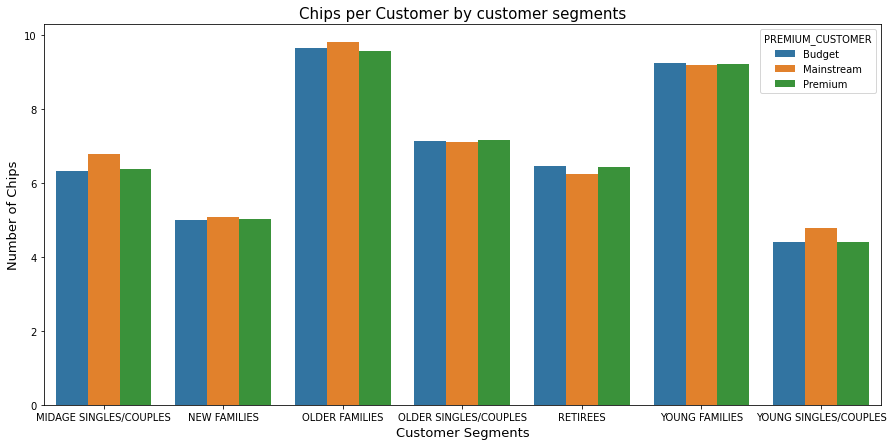

In [34]:
plt.figure(figsize=(15,7))
sns.barplot(data=qty_chips, x="LIFESTAGE", y="chip_per_cust", hue="PREMIUM_CUSTOMER")

plt.xlabel("Customer Segments",size=13)
plt.ylabel("Number of Chips",size=13)
plt.title("Chips per Customer by customer segments",size=15)
plt.show()


- **Top 3** customer segments per customer are:
    * (Mainstream) Older Families
    * (Budget) Older Families
    * (Premium) Older Families
    
- Young Singles/Couples have **least** chips per customer.

In [11]:
df_cleaning.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER',
       'BRAND_NAME', 'PACKAGE_SIZE(gr)'],
      dtype='object')